In [1]:
##Imports

import pandas as pd
import requests
import warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import locale
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

In [2]:
## Convert datetime and set Cipher

#Set local to match the date in german speaking countries
locale.setlocale(locale.LC_ALL, 'de_AT.utf8')
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS += 'HIGH:!DH:!aNULL'
try:
    requests.packages.urllib3.contrib.pyopenssl.DEFAULT_SSL_CIPHER_LIST += 'HIGH:!DH:!aNULL'
except AttributeError:
    # no pyopenssl support used / needed / available
    pass

In [3]:
## Download Data 
#import all necessary csv files
url_list = ["http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1.csv", #data
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_HEADER.csv", #header
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_C-J59-0.csv", #automarken
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_C-A10-0.csv", #datum
    "http://data.statistik.gv.at/data/OGD_f0760ext_OD_PkwGZL_1_C-EK7-0.csv" #fahrzeugtyp
]

# empty lists to store the filenames and the dataframes
filename_list = ["data", "header", "marke", "datum", "typ"]
#Own key for filename (same name as filenames but without .csv)
dataframes = {}

warnings.simplefilter('ignore',InsecureRequestWarning)
# Using for loop 
	
#Create the csv
for i in range(len(url_list)):
    open(filename_list[i]+".csv", 'wb').write(requests.get(url_list[i], verify=False).content)

#Read csv and add to dataframe
for i in range(len(filename_list)):
    dataframes[filename_list[i]] = pd.read_csv(filename_list[i]+".csv", sep=";", header=0)


In [4]:
## Merge Data to get a whole dataframe

#Merge to get the automarkenname
dfgesamt = dataframes["data"].merge(dataframes["marke"], left_on=["C-J59-0"], right_on=["code"],  how='left')[['name','C-A10-0', 'C-EK7-0', 'F-ISIS-1']]

#Rename columns
dfgesamt.columns = ['marke', 'C-A10-0', 'C-EK7-0', 'Anzahl']

#Replace Second Column with date
dfgesamt = dfgesamt.merge(dataframes["datum"], left_on=["C-A10-0"], right_on=["code"],  how='left')[['marke','name', 'C-EK7-0', 'Anzahl']]

#Rename columns
dfgesamt.columns = ['marke','Datum', 'C-EK7-0', 'Anzahl']

#ToDo Replace Third Column with Type
dfgesamt = dfgesamt.merge(dataframes["typ"], left_on=["C-EK7-0"], right_on=["code"],  how='left')[['marke','Datum', 'name', 'Anzahl']]

#Rename columns
dfgesamt.columns = ['marke','Datum', 'Fahrzeugtyp', 'Anzahl']


In [5]:
## Convert Datumcolumn to DateType 


#Split Month and Year
dfgesamt[['Monat','Jahr']] = dfgesamt["Datum"].str.split(" ",expand=True,)


#Convert to datetime
dfgesamt["Datum"] = pd.to_datetime(dfgesamt['Jahr'].astype(str)  + dfgesamt['Monat'], format='%Y%B')


#Drop tmp columns
dfgesamt = dfgesamt.drop(columns=['Jahr', 'Monat'])

In [6]:
## Split Data based on Marke

dfList = []
dict_of_regions = dict(iter(dfgesamt.groupby('marke')))

for key in dict_of_regions:
    dfList.append(pd.DataFrame(dict_of_regions.get(key)))


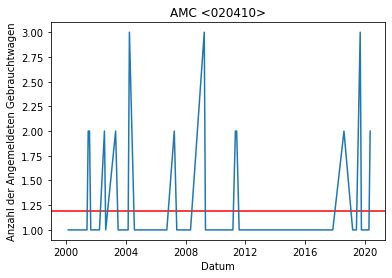

None


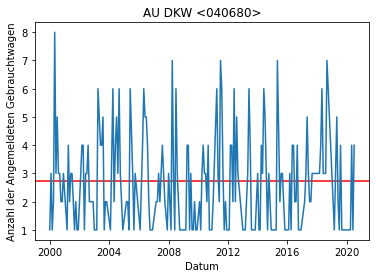

None


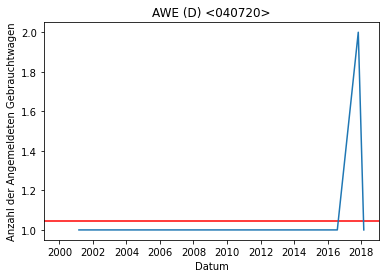

None


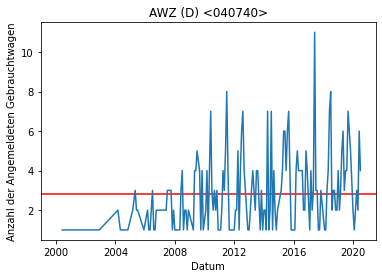

None


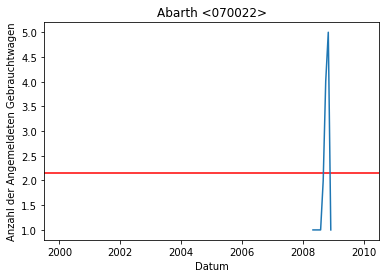

None


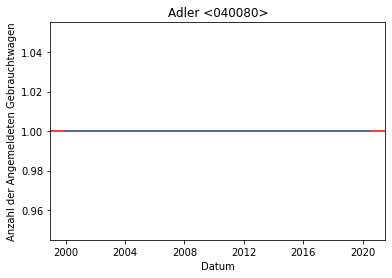

None


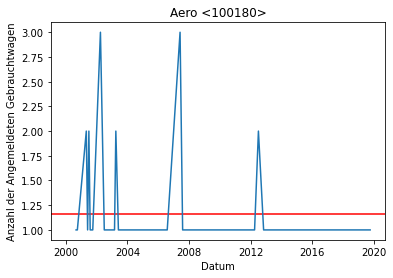

None


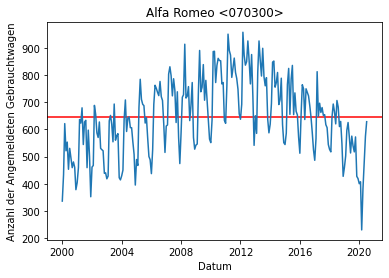

None


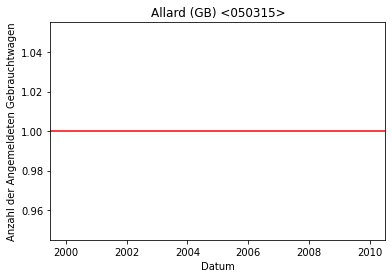

None


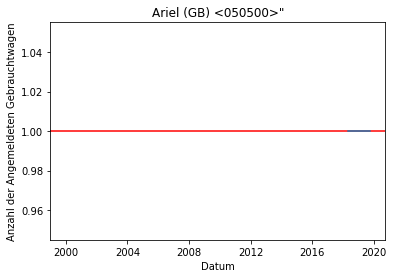

None


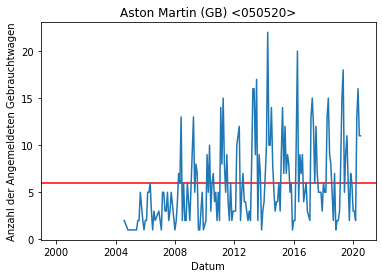

None


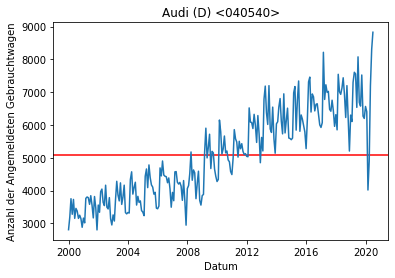

None


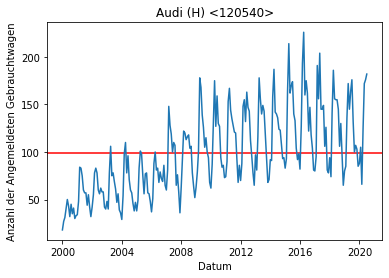

None


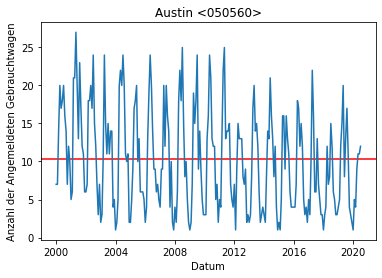

None


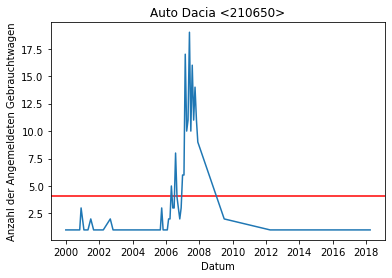

None


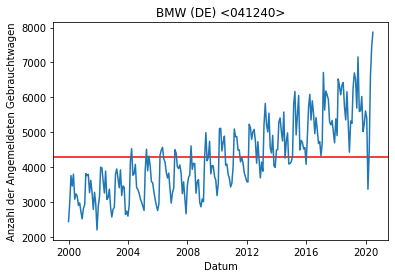

None


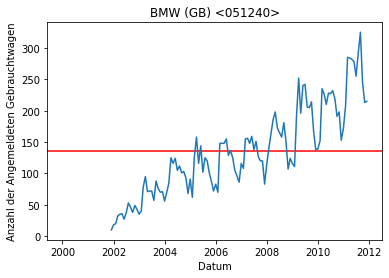

None


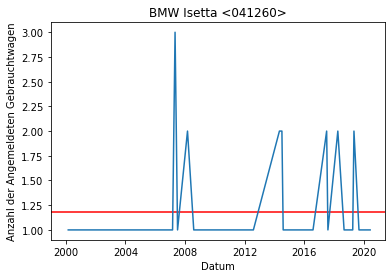

None


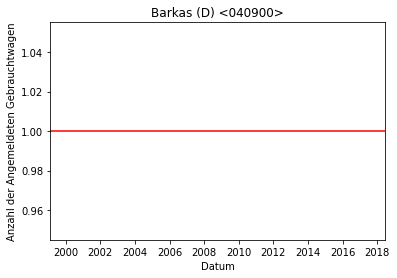

None


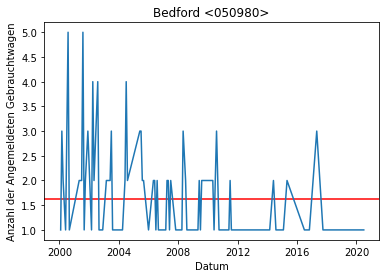

None


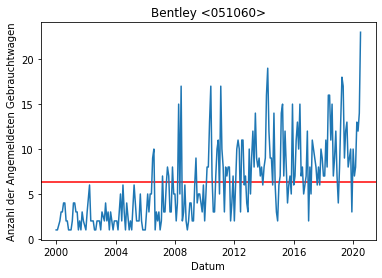

None


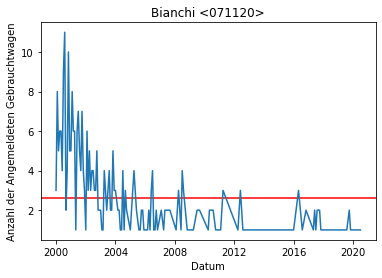

None


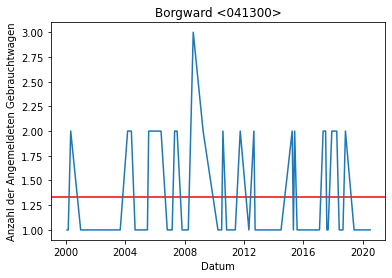

None


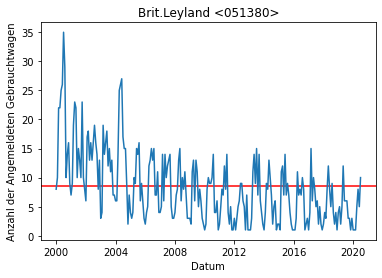

None


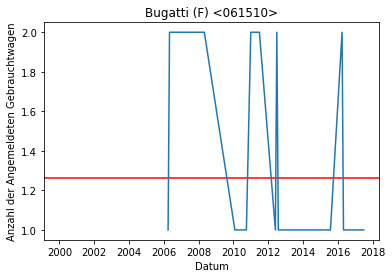

None


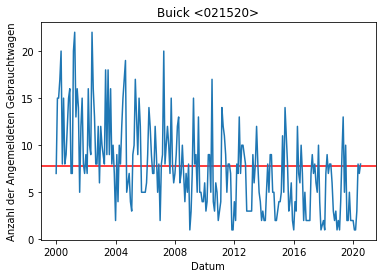

None


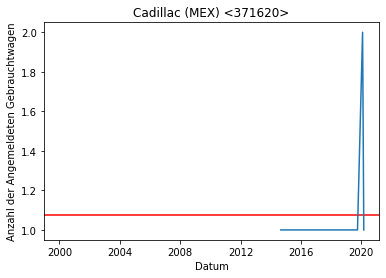

None


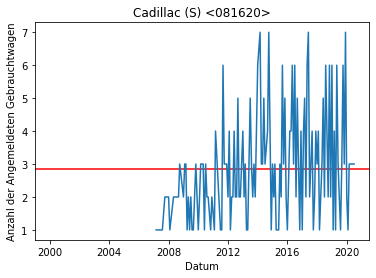

None


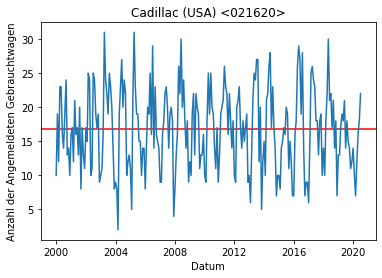

None


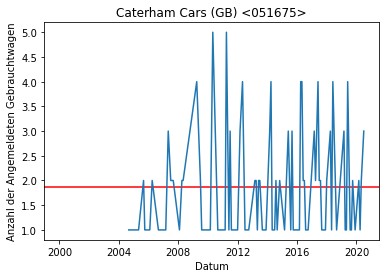

None


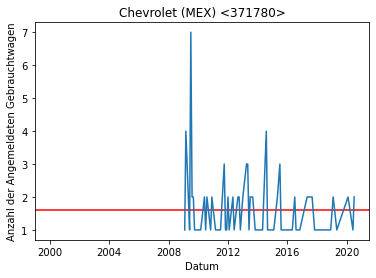

None


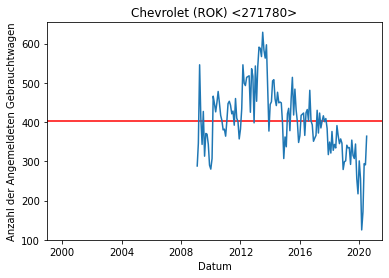

None


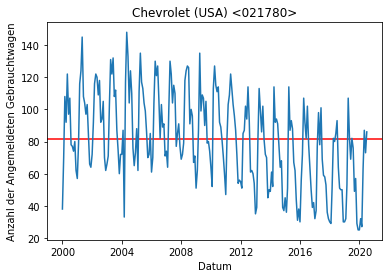

None


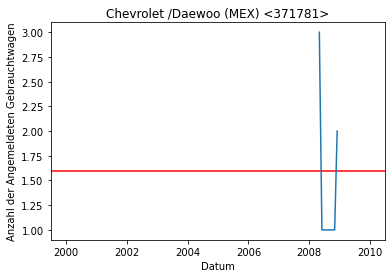

None


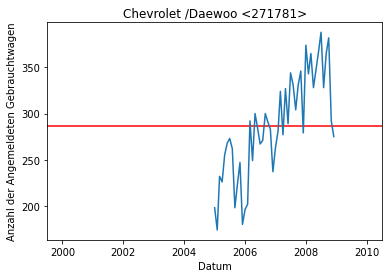

None


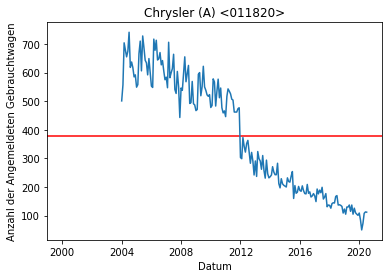

None


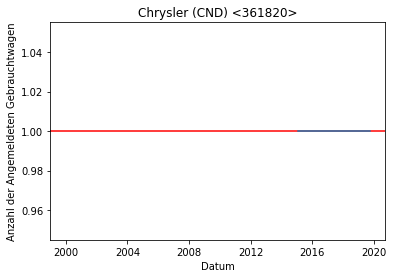

None


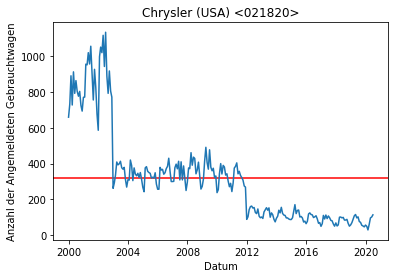

None


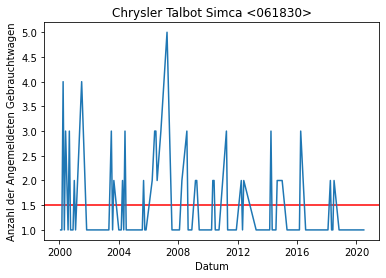

None


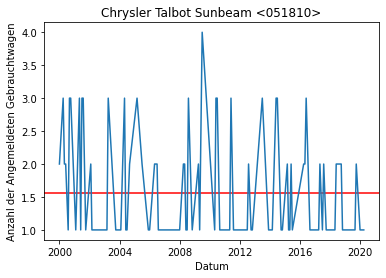

None


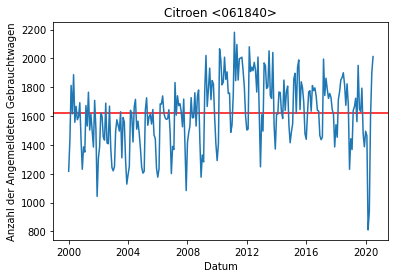

None


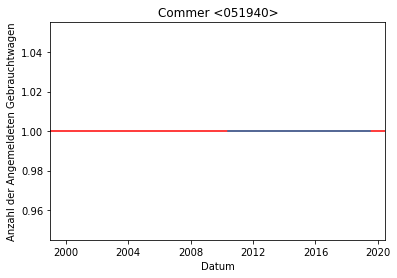

None


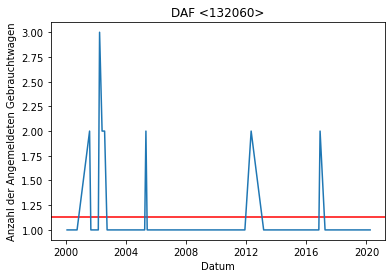

None


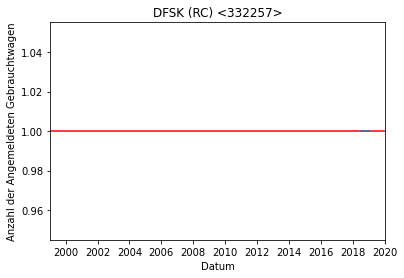

None


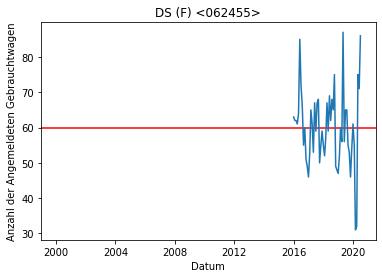

None


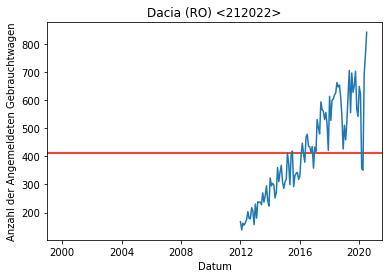

None


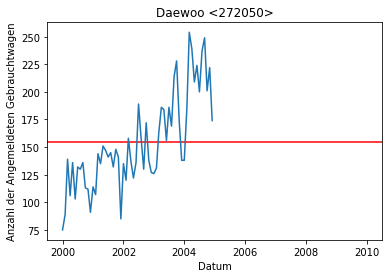

None


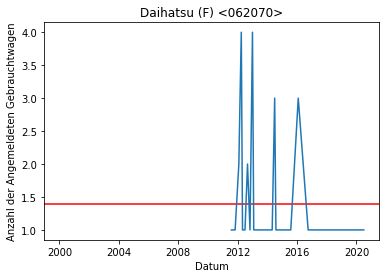

None


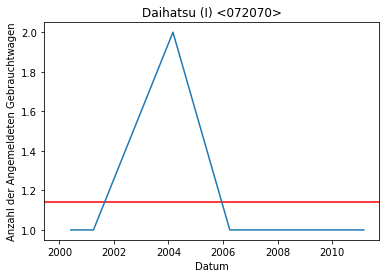

None


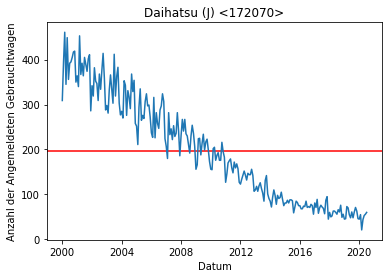

None


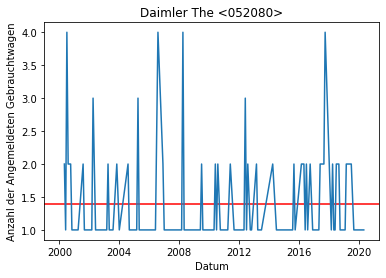

None


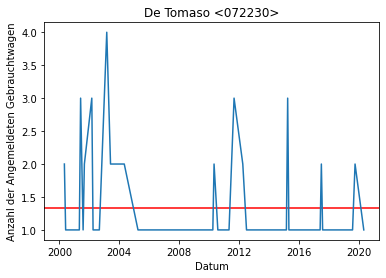

None


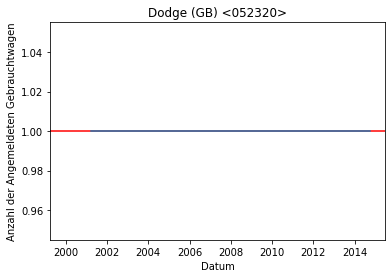

None


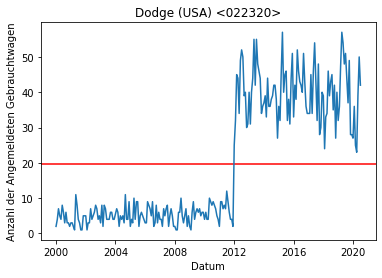

None


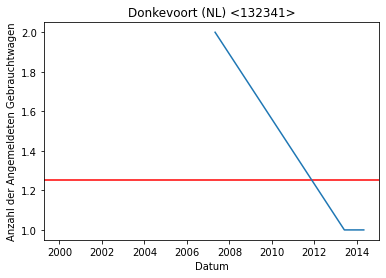

None


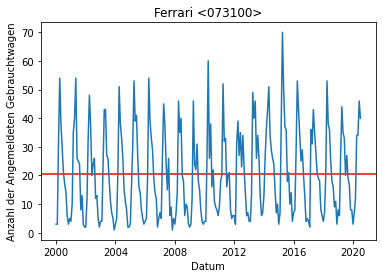

None


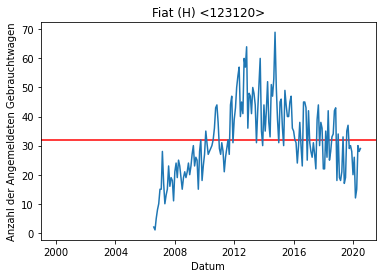

None


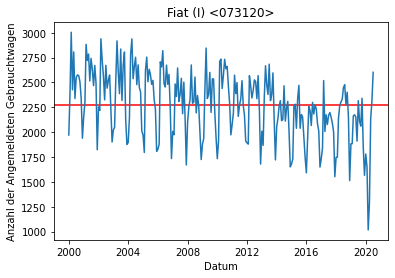

None


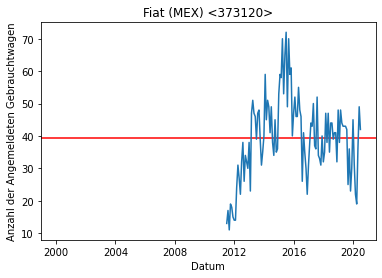

None


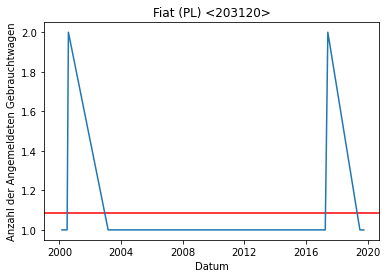

None


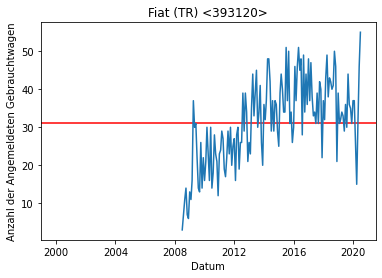

None


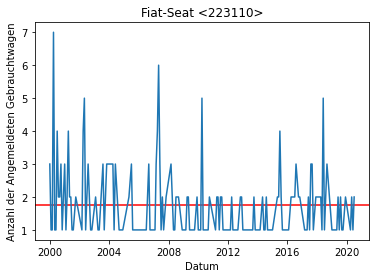

None


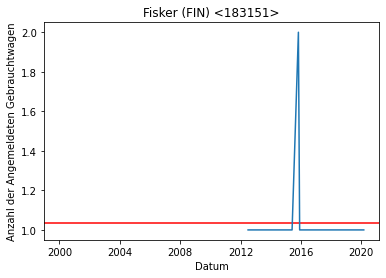

None


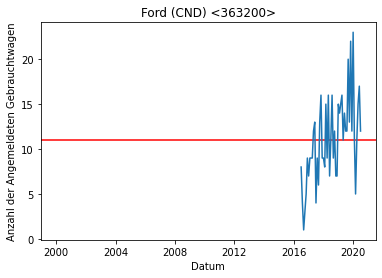

None


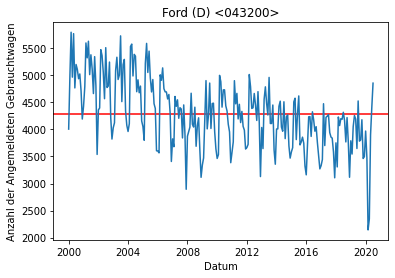

None


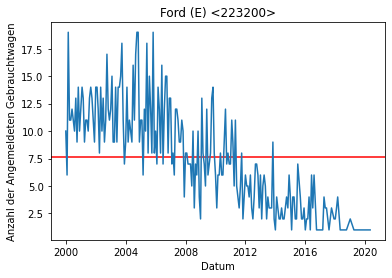

None


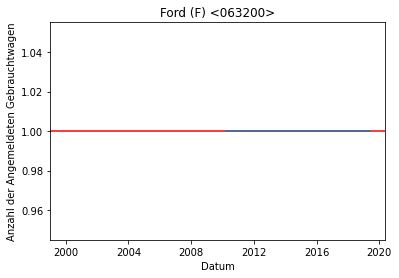

None


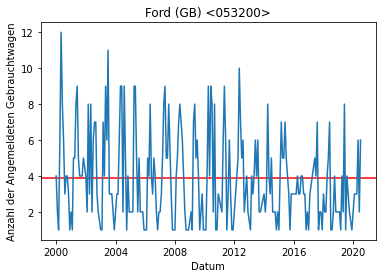

None


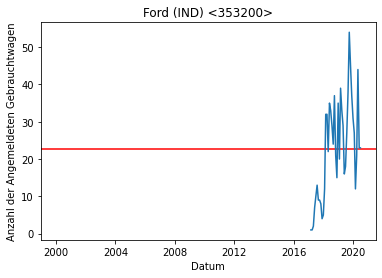

None


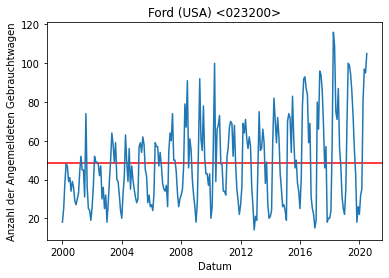

None


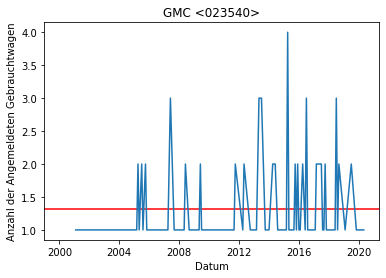

None


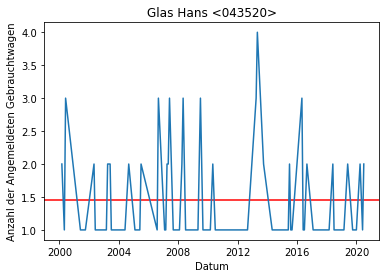

None


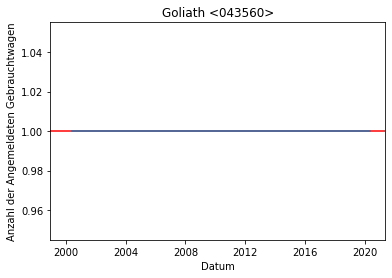

None


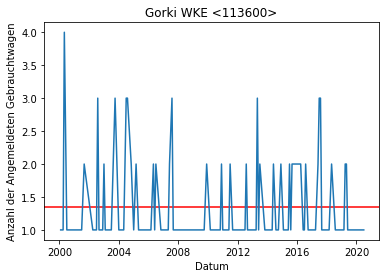

None


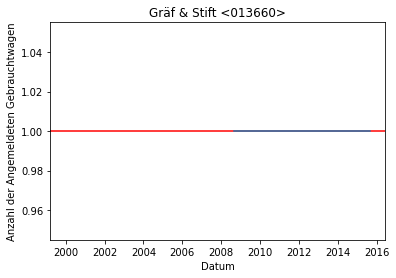

None


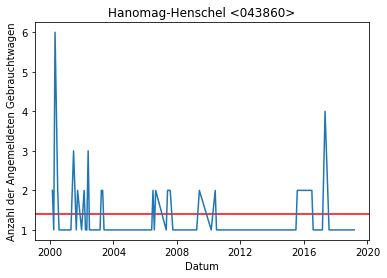

None


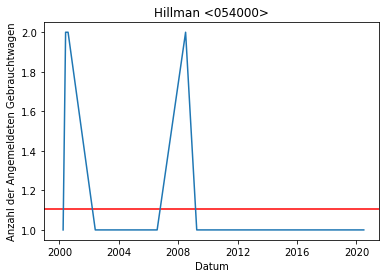

None


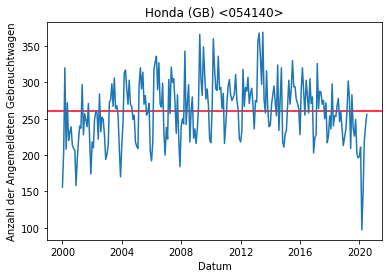

None


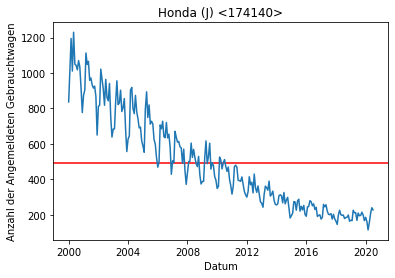

None


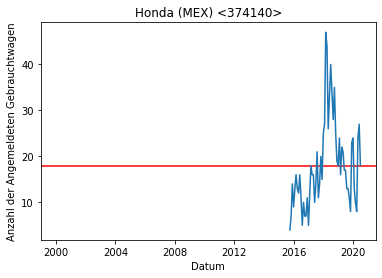

None


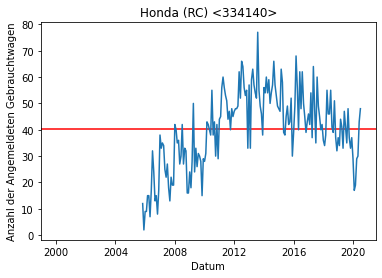

None


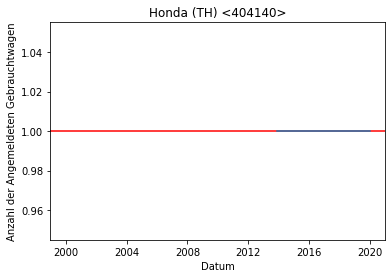

None


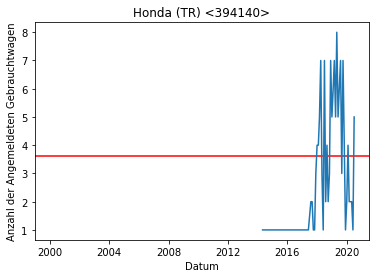

None


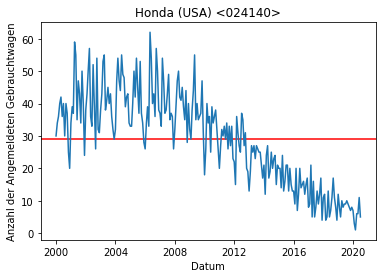

None


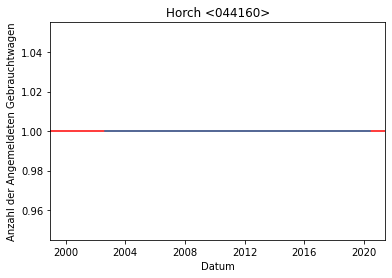

None


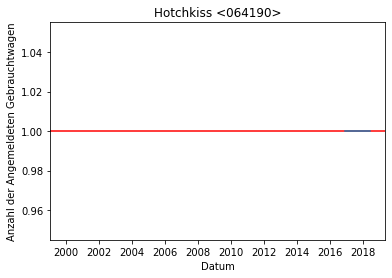

None


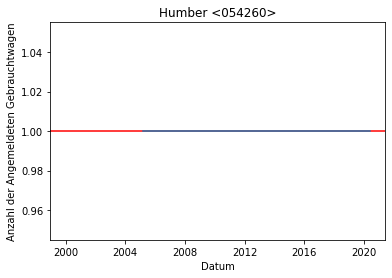

None


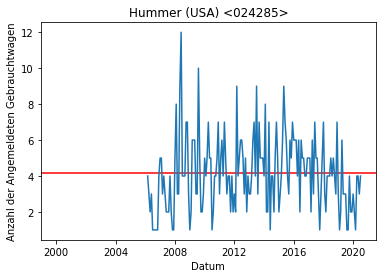

None


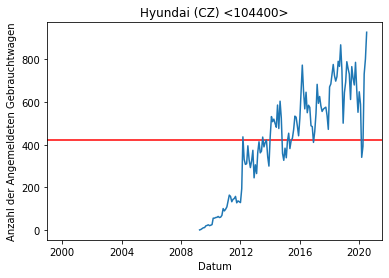

None


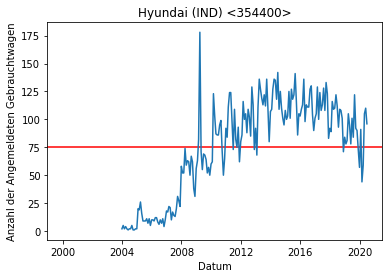

None


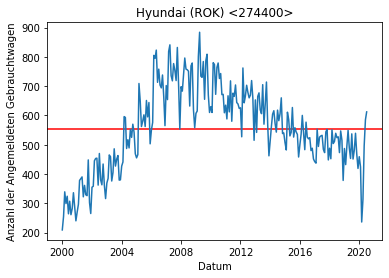

None


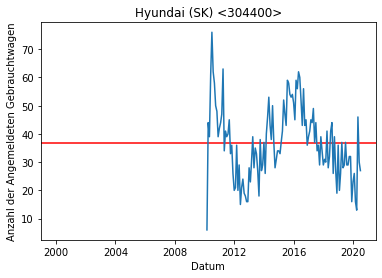

None


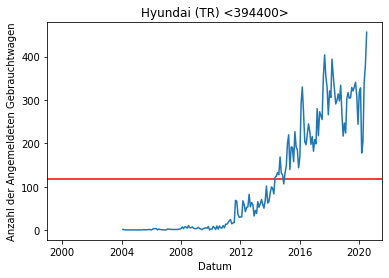

None


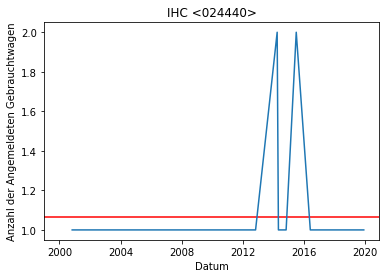

None


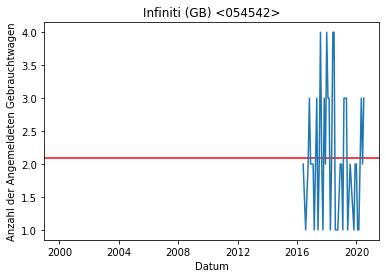

None


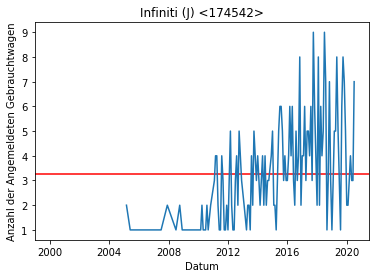

None


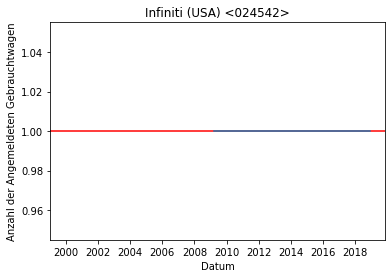

None


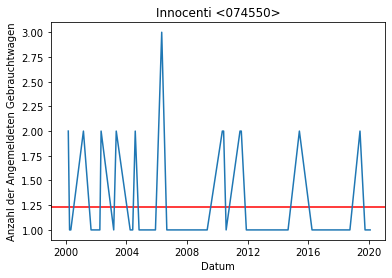

None


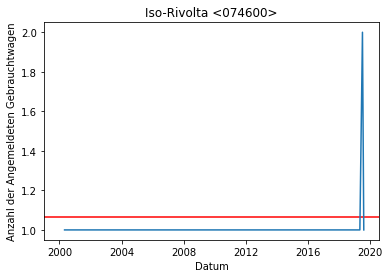

None


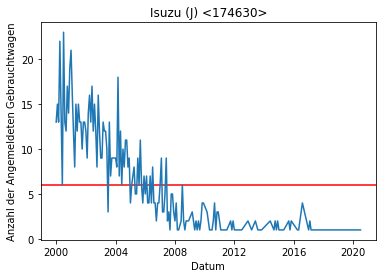

None


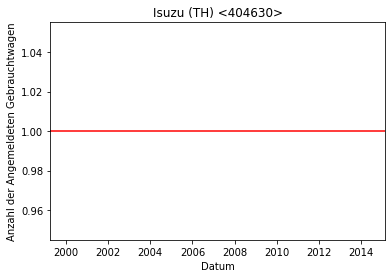

None


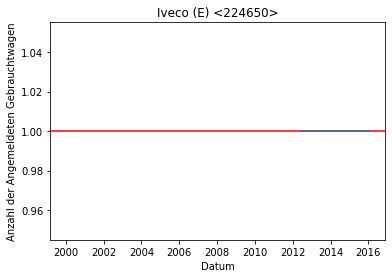

None


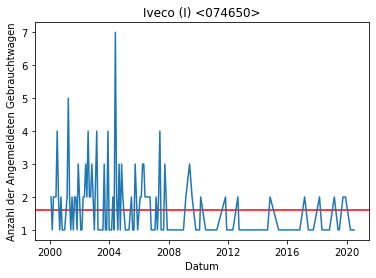

None


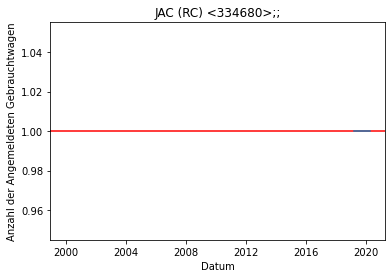

None


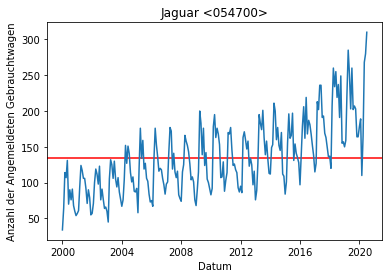

None


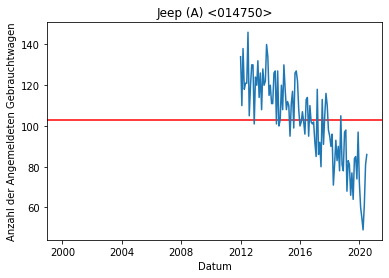

None


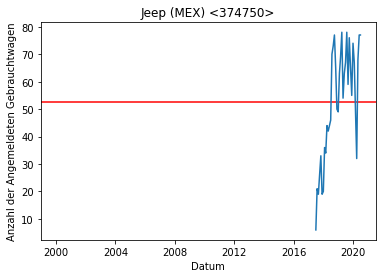

None


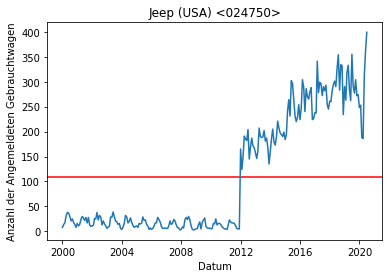

None


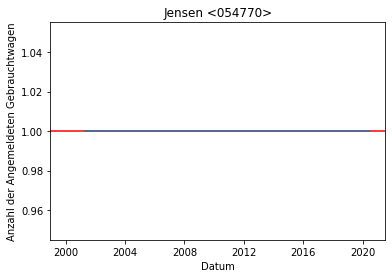

None


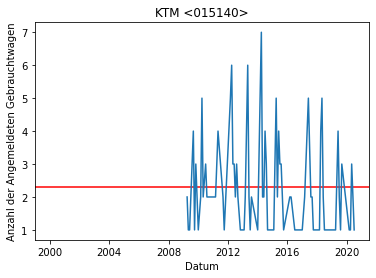

None


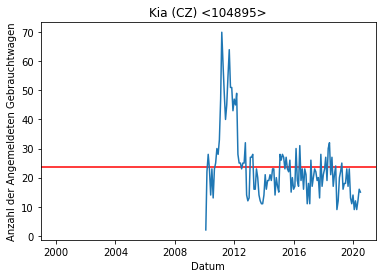

None


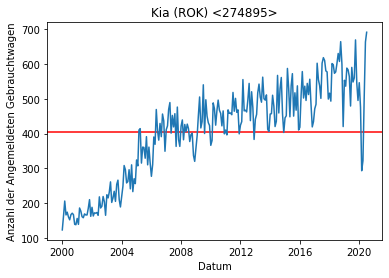

None


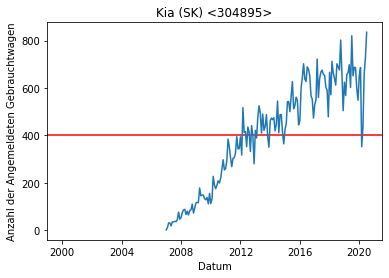

None


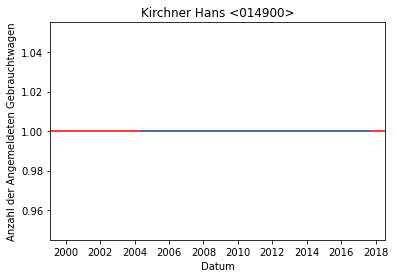

None


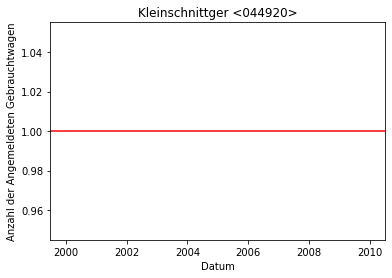

None


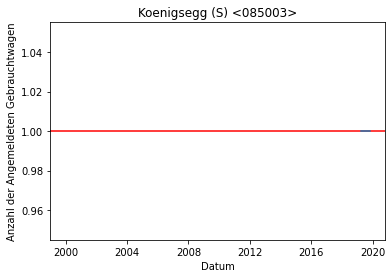

None


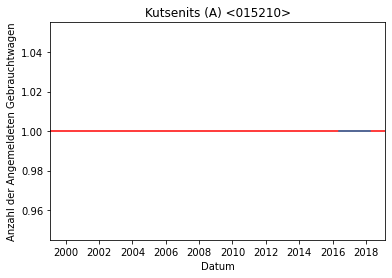

None


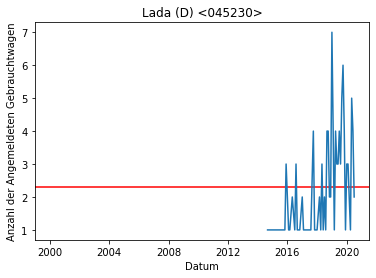

None


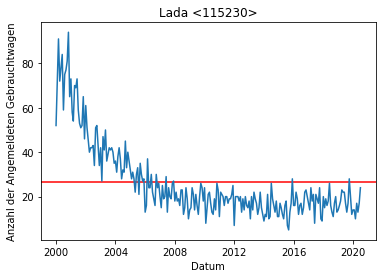

None


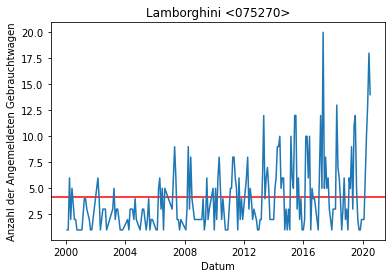

None


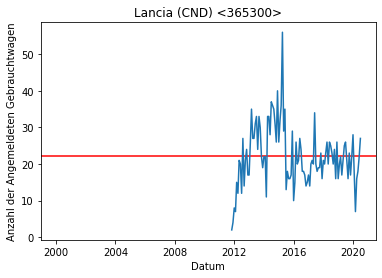

None


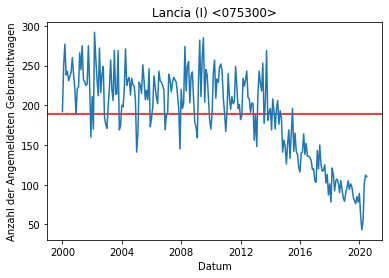

None


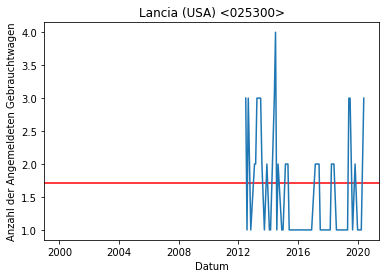

None


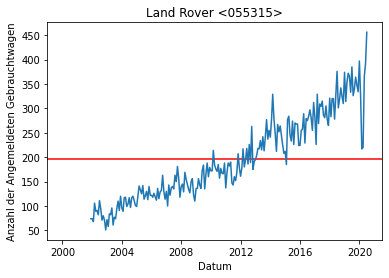

None


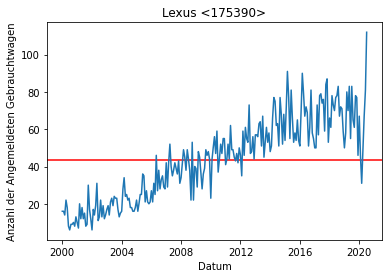

None


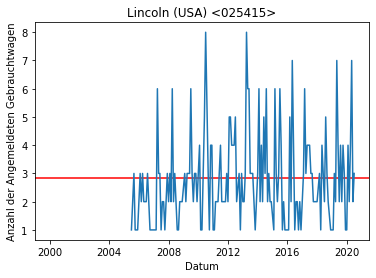

None


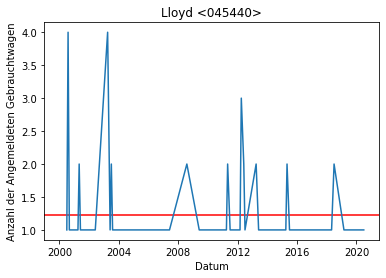

None


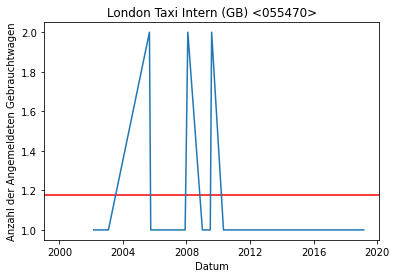

None


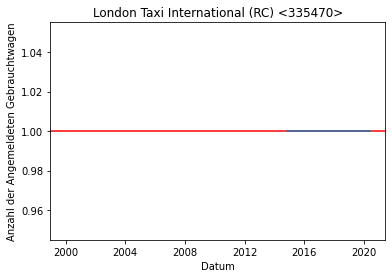

None


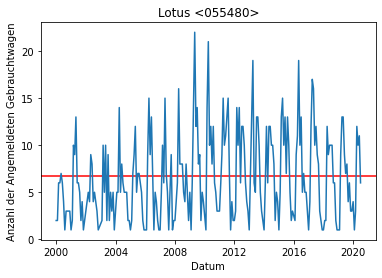

None


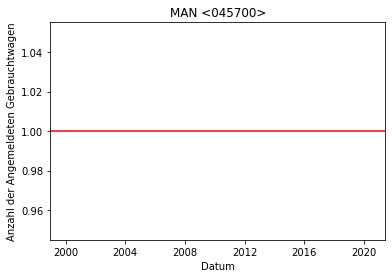

None


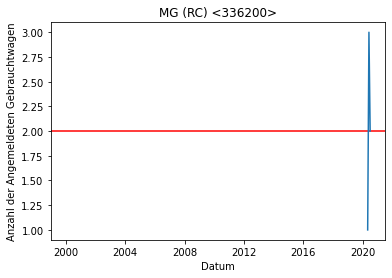

None


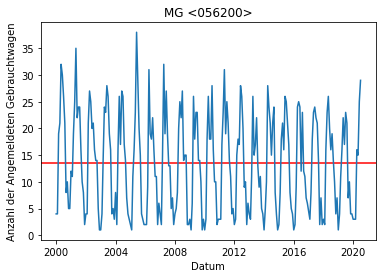

None


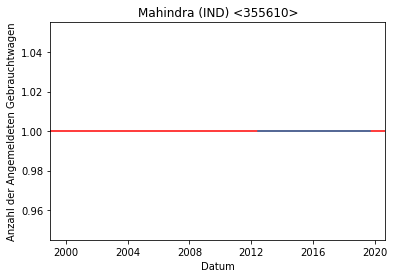

None


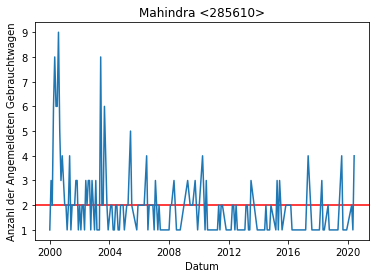

None


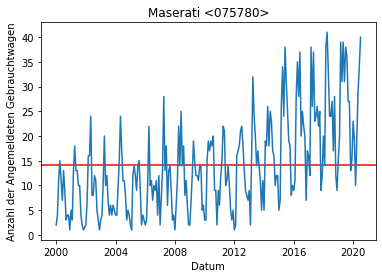

None


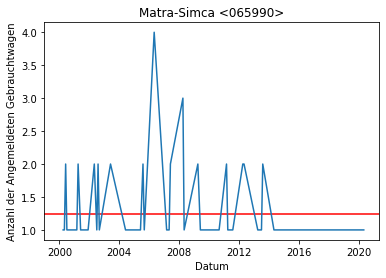

None


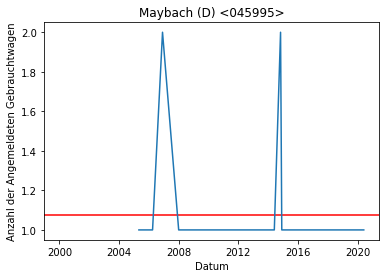

None


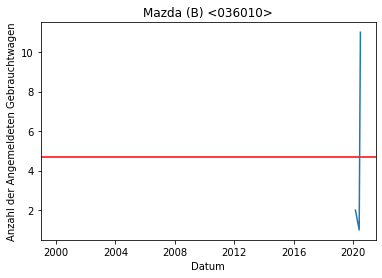

None


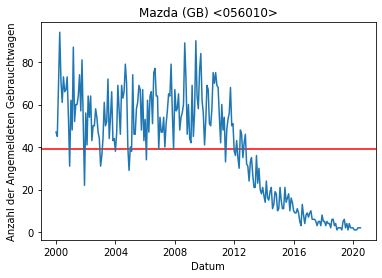

None


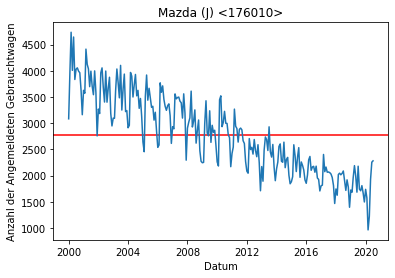

None


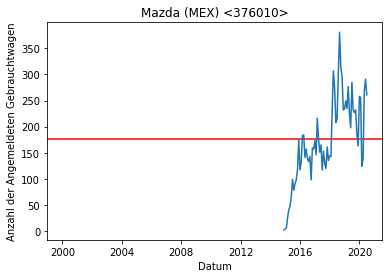

None


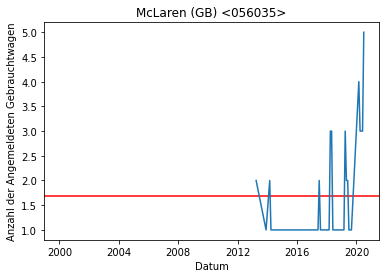

None


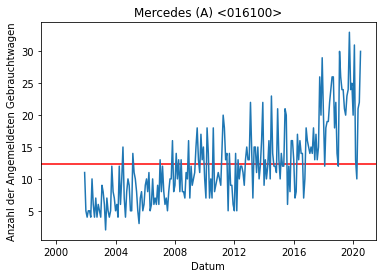

None


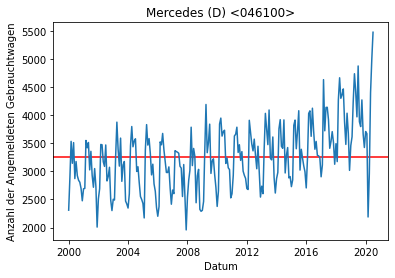

None


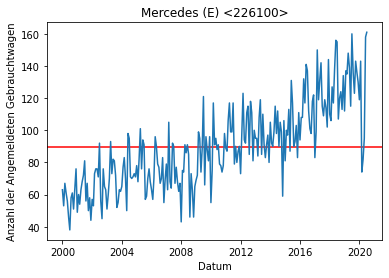

None


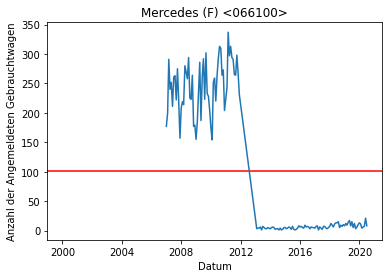

None


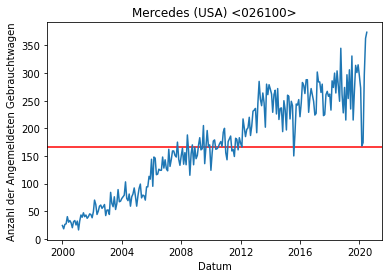

None


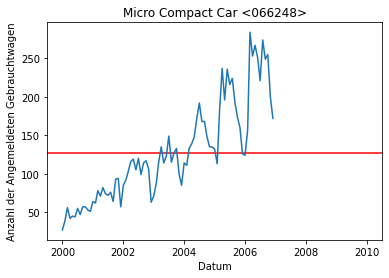

None


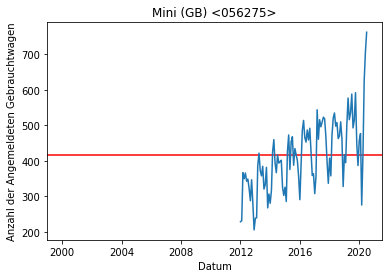

None


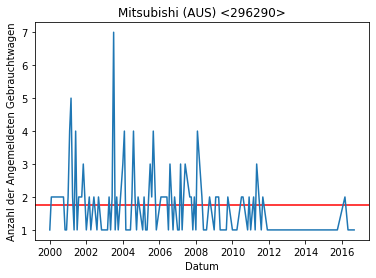

None


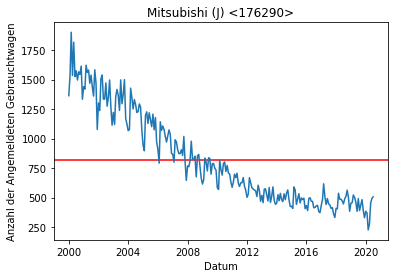

None


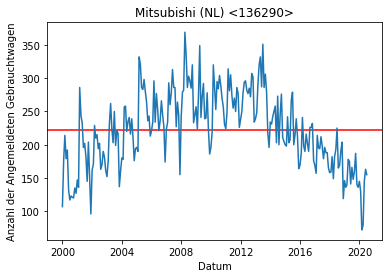

None


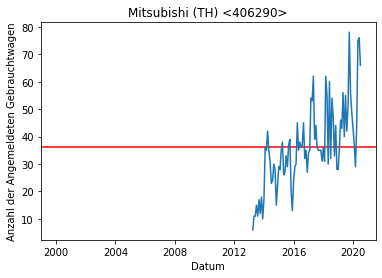

None


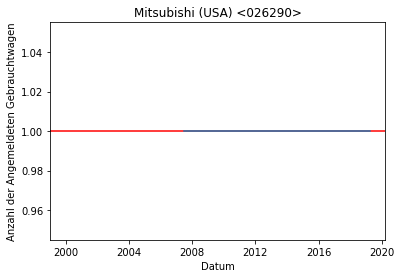

None


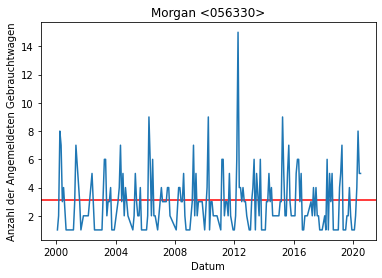

None


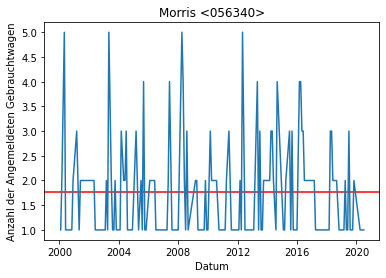

None


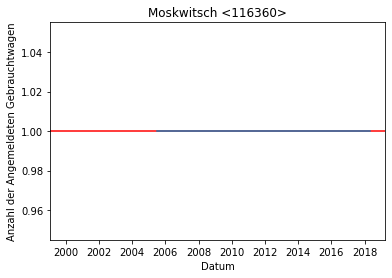

None


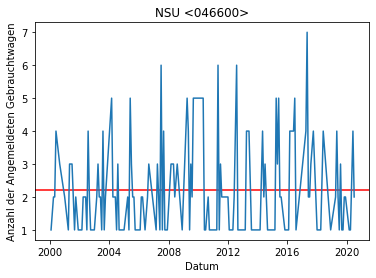

None


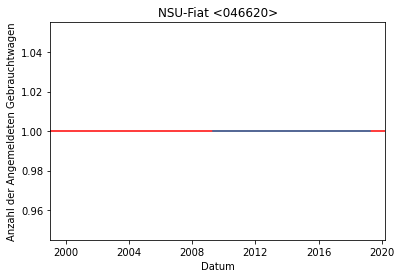

None


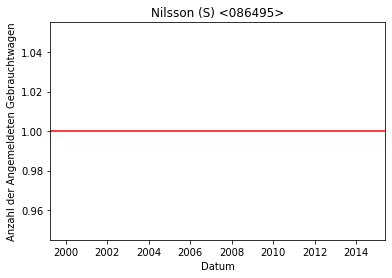

None


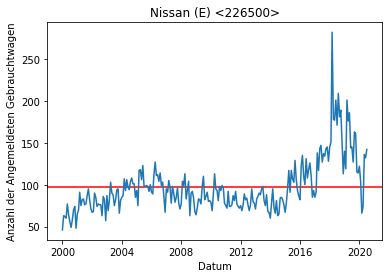

None


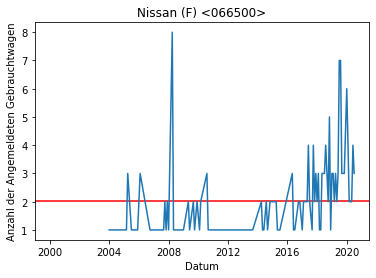

None


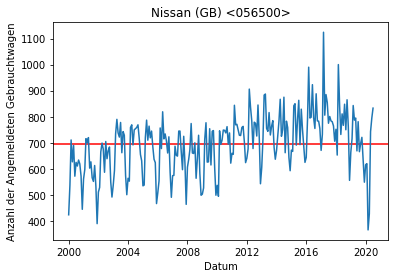

None


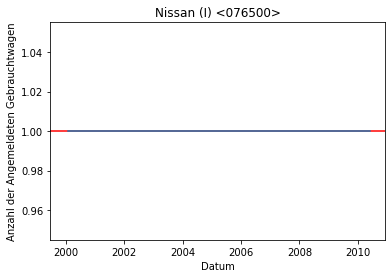

None


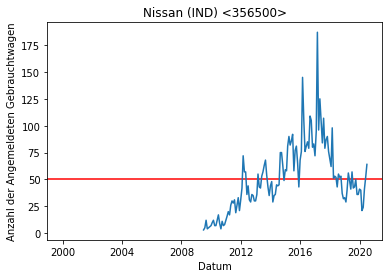

None


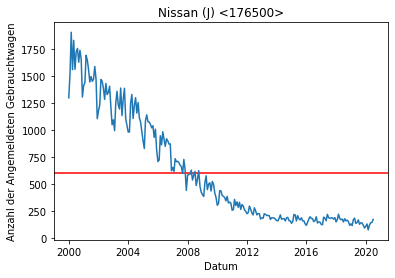

None


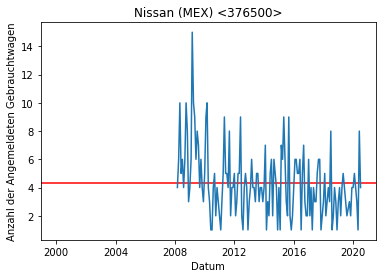

None


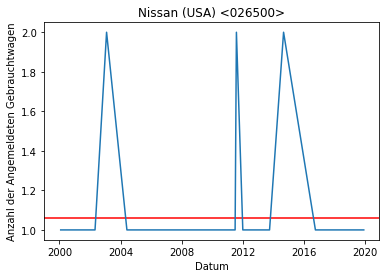

None


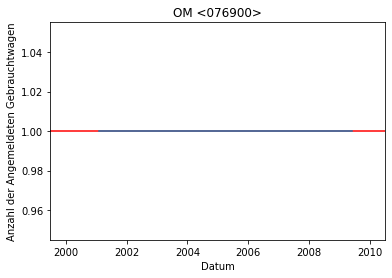

None


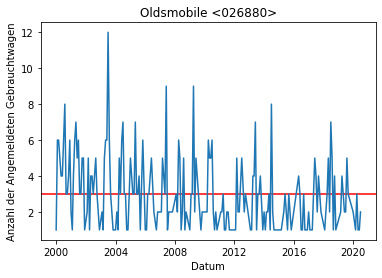

None


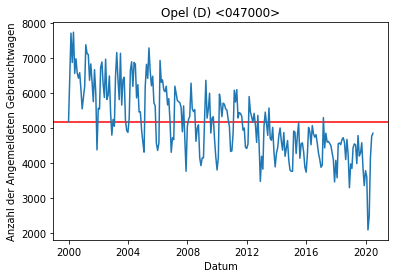

None


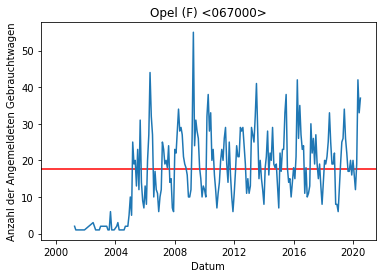

None


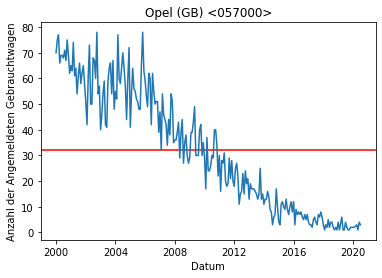

None


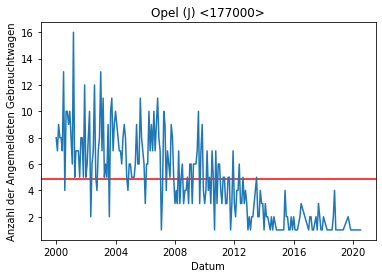

None


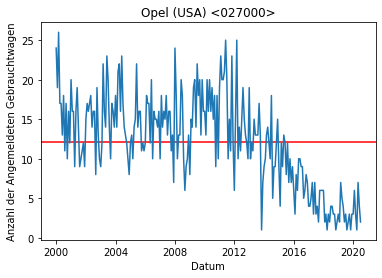

None


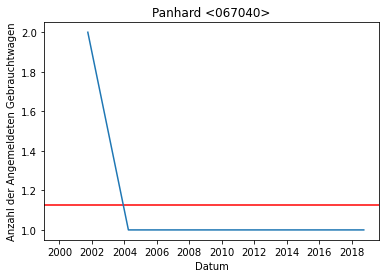

None


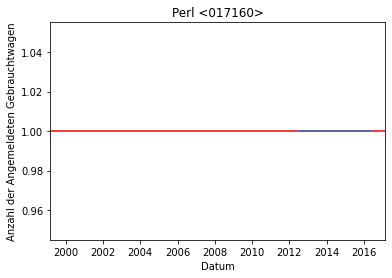

None


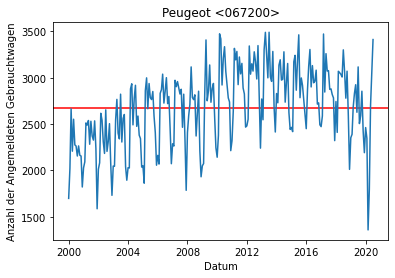

None


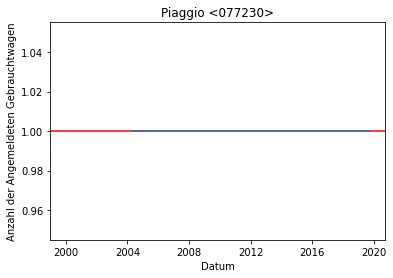

None


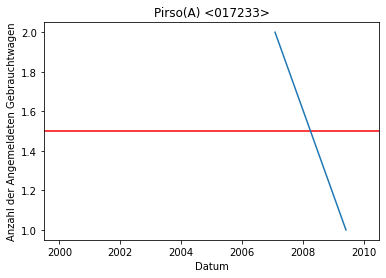

None


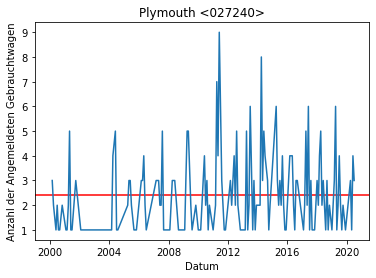

None


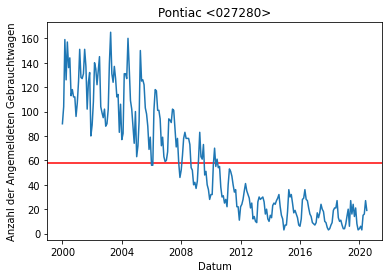

None


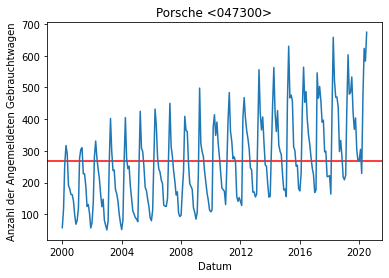

None


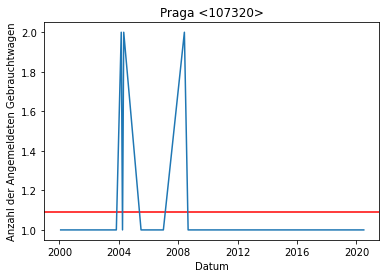

None


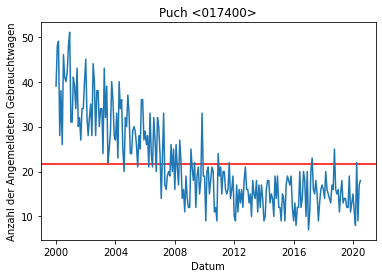

None


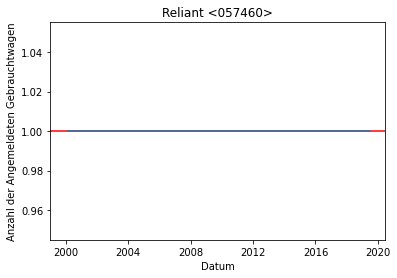

None


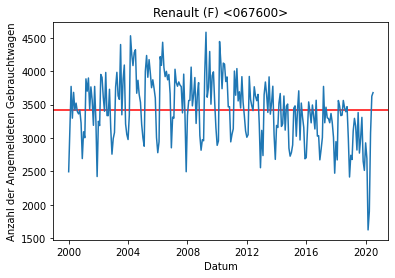

None


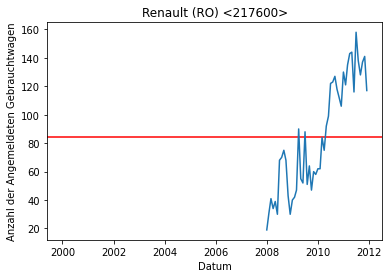

None


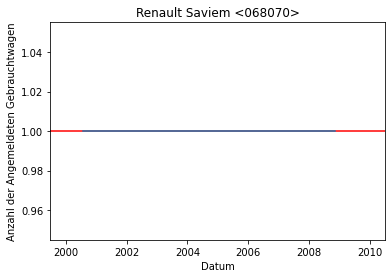

None


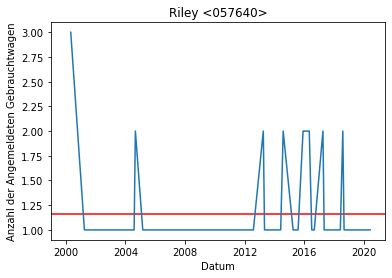

None


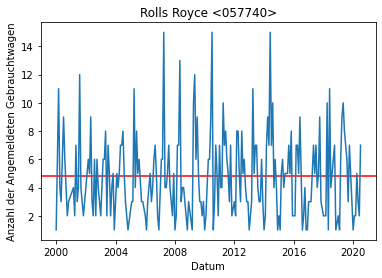

None


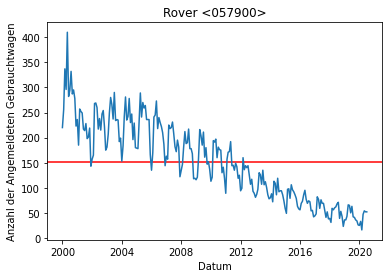

None


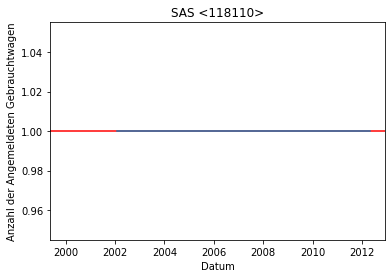

None


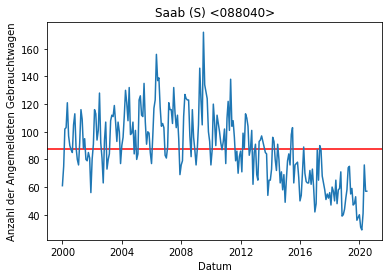

None


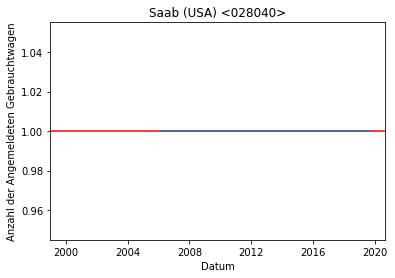

None


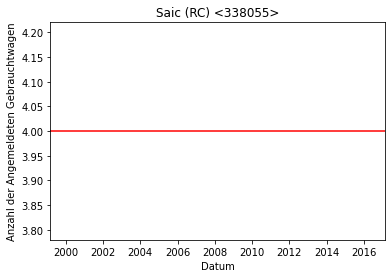

None


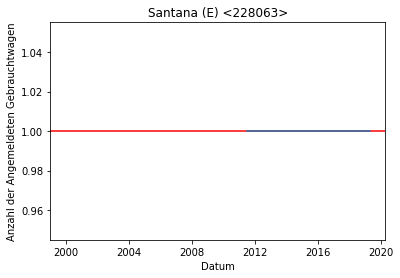

None


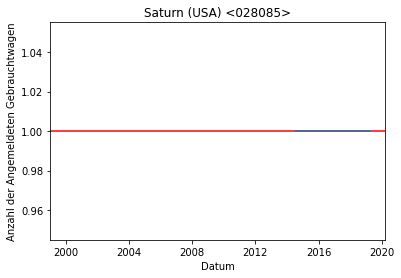

None


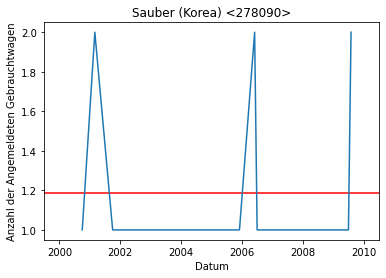

None


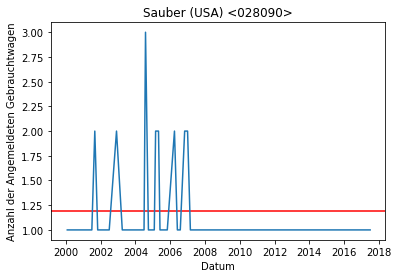

None


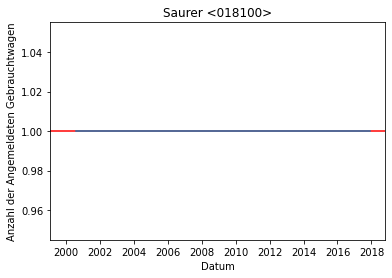

None


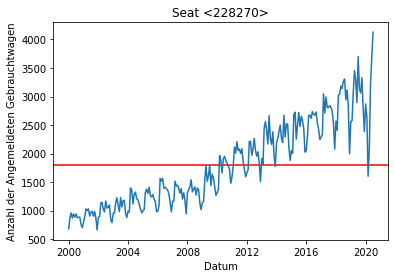

None


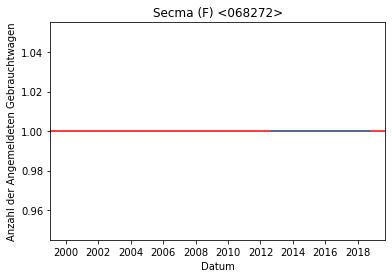

None


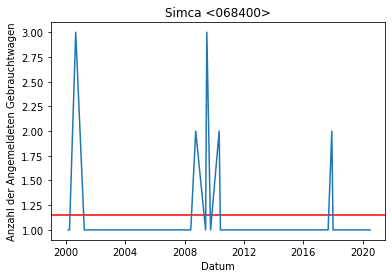

None


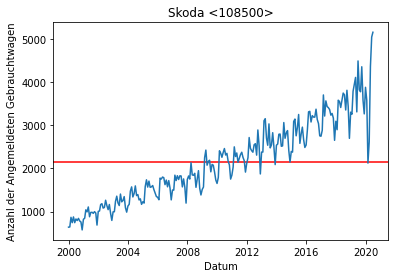

None


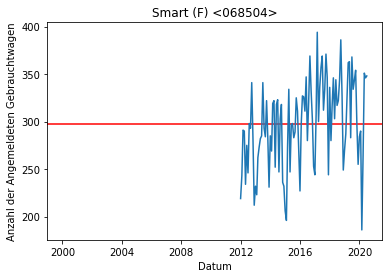

None


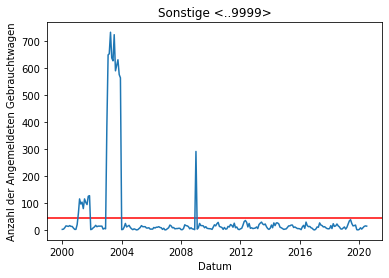

None


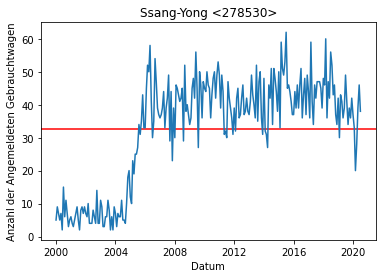

None


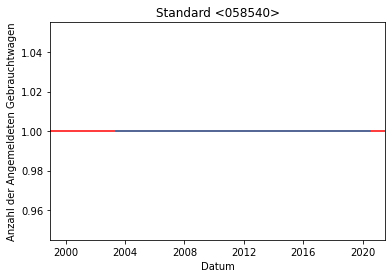

None


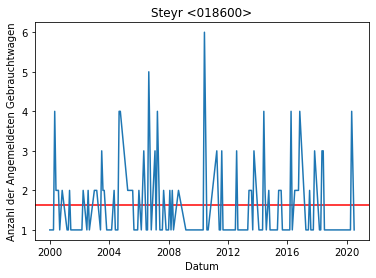

None


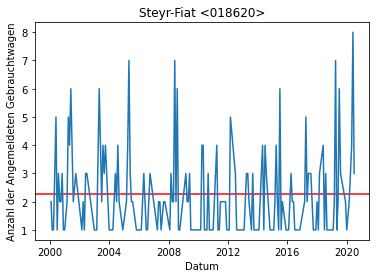

None


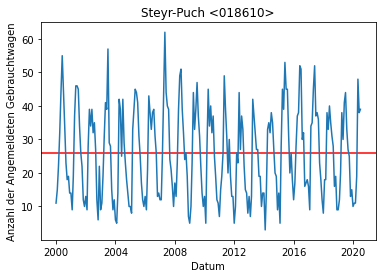

None


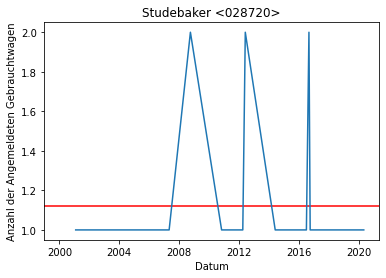

None


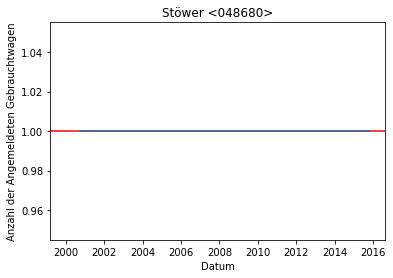

None


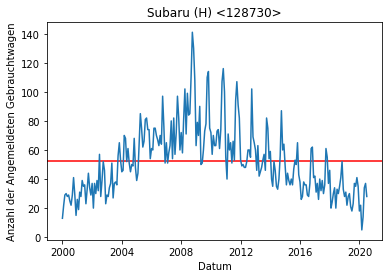

None


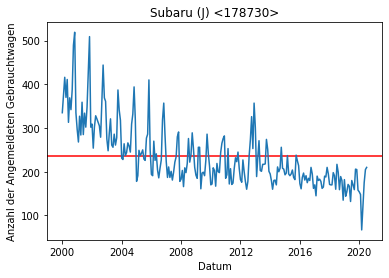

None


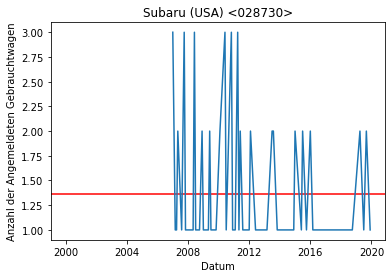

None


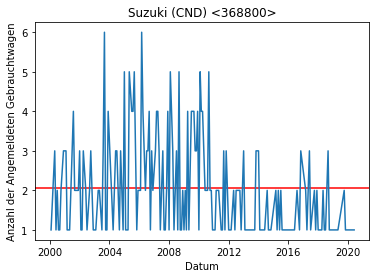

None


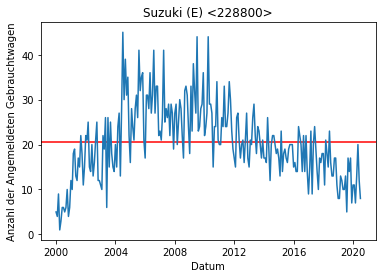

None


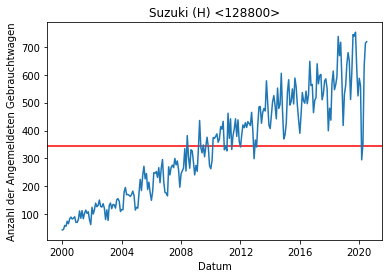

None


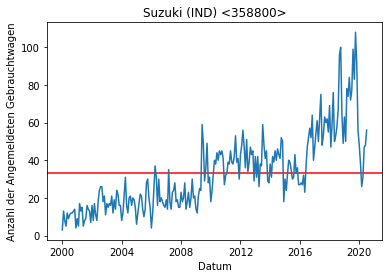

None


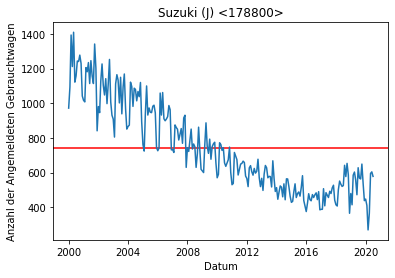

None


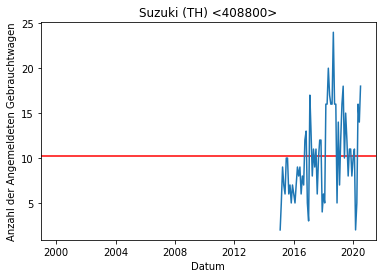

None


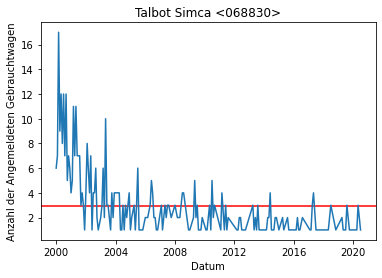

None


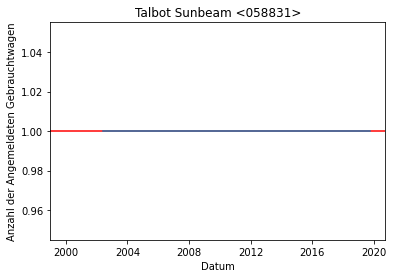

None


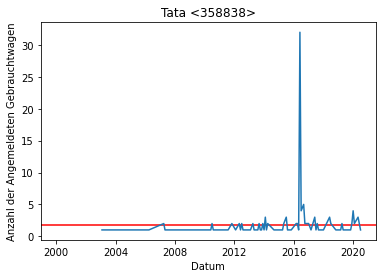

None


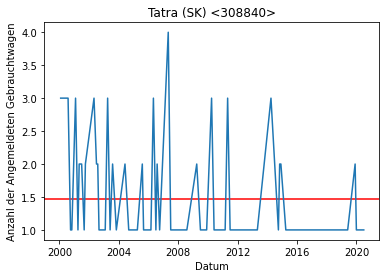

None


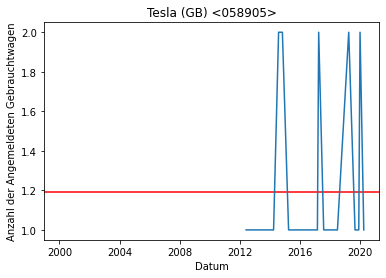

None


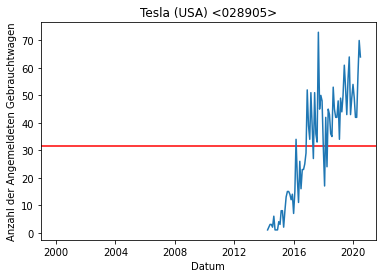

None


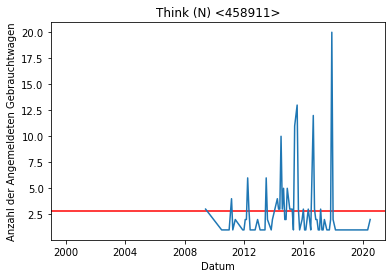

None


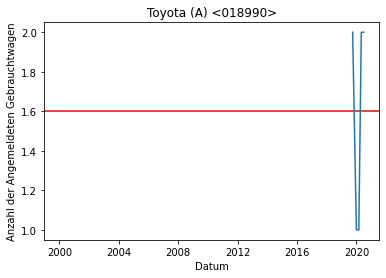

None


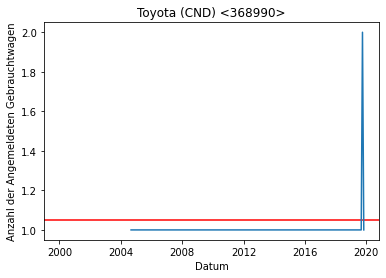

None


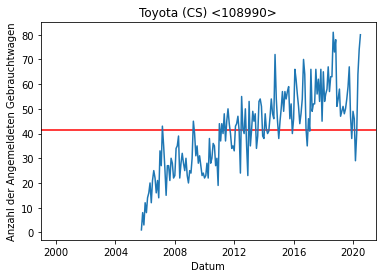

None


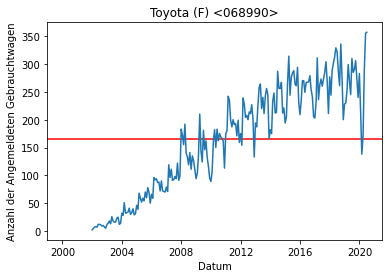

None


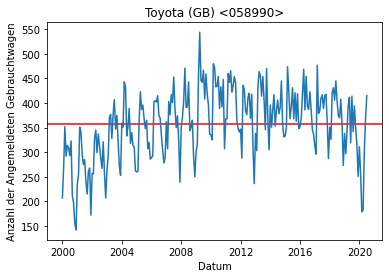

None


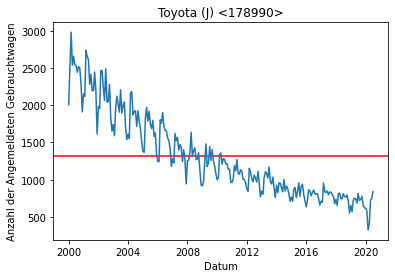

None


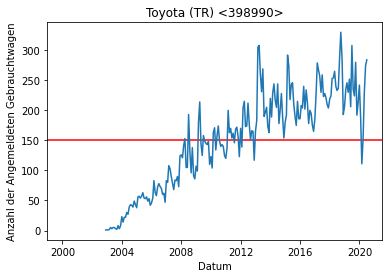

None


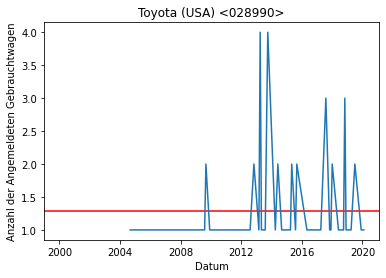

None


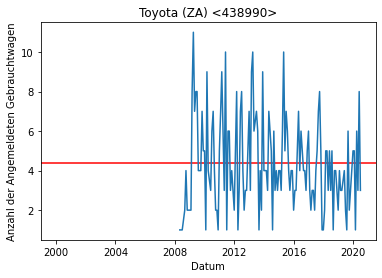

None


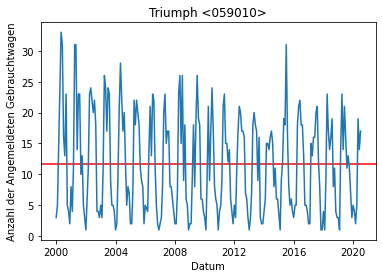

None


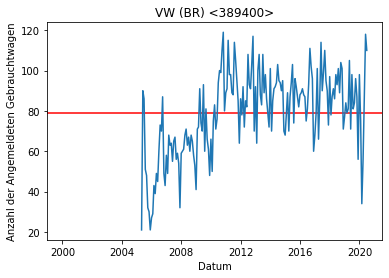

None


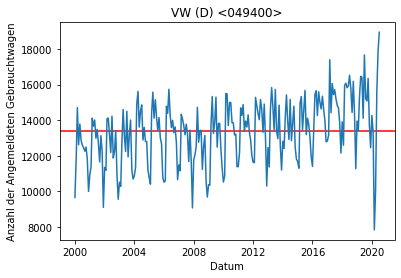

None


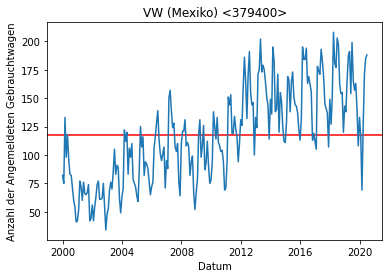

None


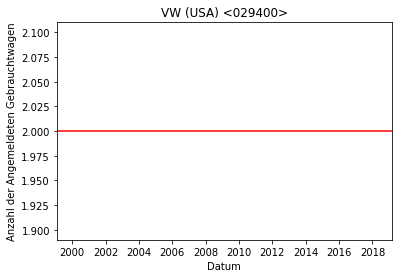

None


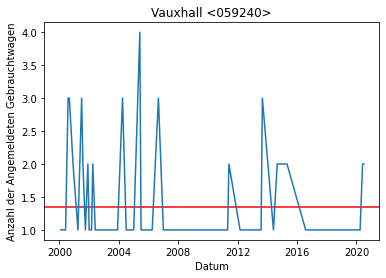

None


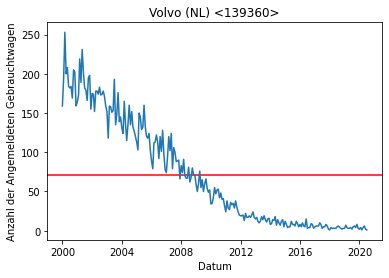

None


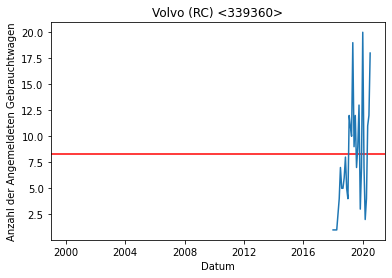

None


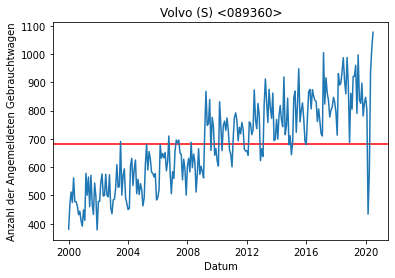

None


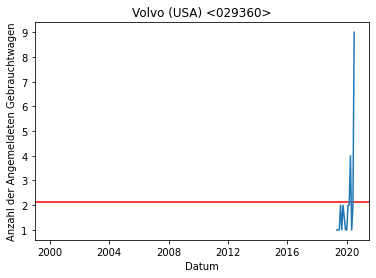

None


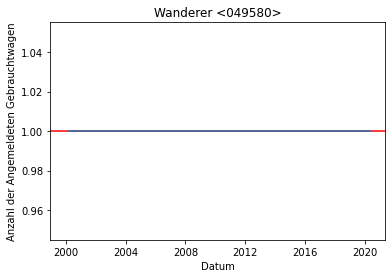

None


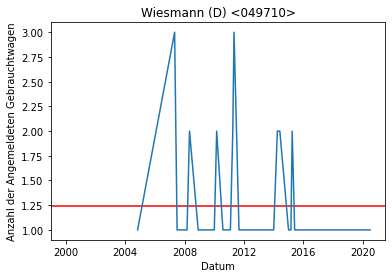

None


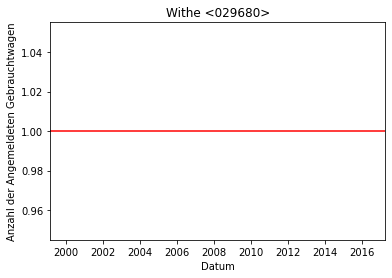

None


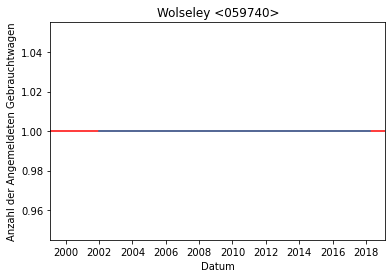

None


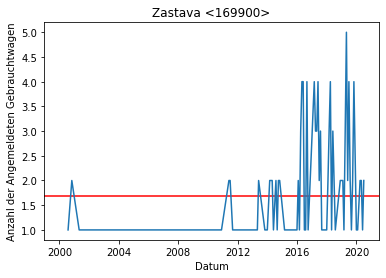

None


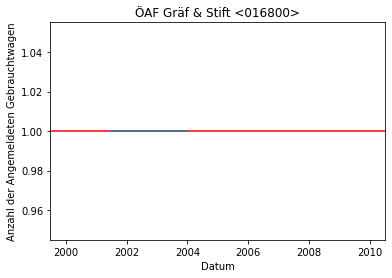

None


In [7]:
## Plot

for df in dfList:
    
    x = df["Datum"].values
    y = df["Anzahl"].values
    if not pd.isnull(df["marke"].values[0]):
        plt.title(df["marke"].values[0])
        
    plt.axhline(y.mean(), c='red')
    plt.ylabel('Anzahl der Angemeldeten Gebrauchtwagen')
    plt.xlabel('Datum')
    plt.plot(x, y)
    plt.show()
    print(display(HTML("<h2>Test</h2>")))
    


In [8]:
# Export
import os

os.system('jupyter nbconvert --output-dir="../../kienil.github.io/gebrauchtwagen" --TemplateExporter.exclude_input=True --to html pkw-zulassung.ipynb --output index.html')
os.system('jupyter nbconvert --output-dir="../../kienil.github.io/gebrauchtwagen" --to html pkw-zulassung.ipynb --output index_developer.html')


0